# Heavy Traffic Indicators on I-94

<span style="font-family:verdana">Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. The project is about analyzing the traffic conditions and try to figure out the trends and factors for the traffic.</span>

<span style="font-family:verdana">Our analysis aims to identify key factors that contribute to heavy traffic on I-94. These factors could include various aspects such as weather conditions, time of day, day of the week, and other relevant variables. By examining these indicators, we can gain insights into patterns and trends that influence traffic congestion. For instance, our analysis may reveal that heavy traffic is more prevalent during the summer season or when there are adverse weather conditions like snowfall.</span>

<span style="font-family:verdana">Let's import libraries that we need in this project:</span>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The I-94 Traffic Dataset

In [18]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [19]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [20]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


<span style="font-family:verdana">The dataset has 48.204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour - we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.</span>

<span style="font-family:verdana">We must admit that this dataset about rotation in westbound (i.e. cars moving from east to west). This means that we must avoid generalizing our results for the entire I-94 highway.</span>

## Analyzing Traffic Volume

<span style="font-family:verdana">We're going to start our analysis by examining the distribution of the <i>`traffic_volume`</i> column.</span>

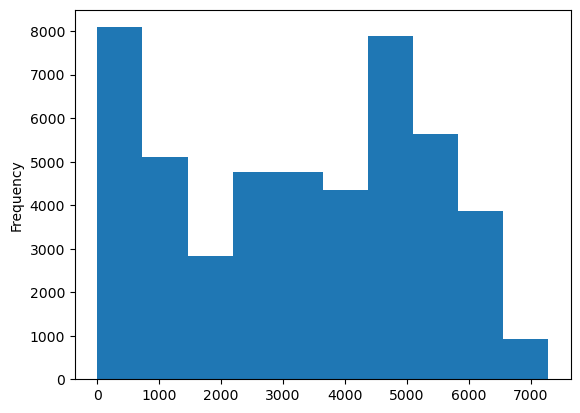

In [21]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [22]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

<span style="font-family:verdana">We can see that during the time(that we have mentioned) the hourly traffic volume varied from 0 to 7.280 cars. Average: 3.260 cars</span>

<span style="font-family:verdana">As we can observe, about 25% of the time, there were only 1.193 cars or fewer - this can be during the night or when the road is under construction etc. However, about 25% of the time, the traffic volume was in 4 times more: 4.933 or more.</span>

<span style="font-family:verdana"> This observation gives our analysis the direction: compare daytime with nighttime data.</span>

## Traffic Volume: Day vs Night

<span style="font-family:verdana">We'll start by dividing the dataset into two parts:
- <span style="font-family:verdana">Daytime data: hours from 7AM to 7PM (12 hours)
- <span style="font-family:verdana">Nighttime data: hours from 7PM to 7AM (12 hours)
    
<span style="font-family:verdana">While this is not a perfect criterion for distinguishing between daytime and nighttime, it's a good start.

In [23]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


<span style="font-family:verdana">This difference in row numbers between `day` and `night` can be of missing data ( a few hours ).

## Traffic Volume: Day vs Night (II)

<span style="font-family:verdana">Now that we've isolated `day` and `night`, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

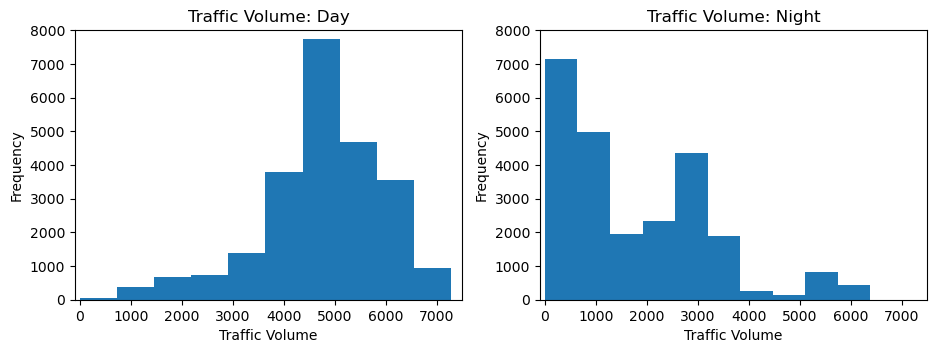

In [24]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [25]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [26]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

<span style="font-family:verdana">The distribution of traffic volume during the day is skewed to the left, as indicated by the histogram. This suggests that a majority of the recorded traffic volume values are relatively high. Specifically, 75% of the time, there are 4,252 or more cars passing the station each hour. This conclusion is drawn based on the fact that the lower quartile is below 4,252, indicating that a quarter of the values are less than this threshold.

<span style="font-family:verdana">The distribution of traffic volume during nighttime exhibits a right skew, as observed from the histogram. This indicates that a majority of the recorded traffic volume values are relatively low. Specifically, 75% of the time, the number of cars passing the station each hour is less than 2,819. This inference is based on the fact that the upper quartile (75th percentile) falls below 2,819, implying that three-quarters of the values are below this threshold.

<span style="font-family:verdana">Given that the nighttime traffic is generally light, with only occasional measurements exceeding 5,000 cars per hour, our focus will be primarily on the daytime data for identifying indicators of heavy traffic. As our goal is to analyze and understand the factors contributing to heavy traffic, we will exclude the nighttime data from further analysis and concentrate on the daytime observations. By narrowing our focus to the periods of higher traffic volume, we can better identify the indicators and patterns associated with heavy traffic on I-94.

## Time Indicators

<span style="font-family:verdana">Time serves as a potential indicator for heavy traffic, with variations based on the month, day, and time of day. These factors can influence the volume of vehicles on the road.
- <span style="font-family:verdana">`Month`: Specific months may experience increased traffic due to various factors. For instance, holiday seasons or events can lead to higher road congestion as more people travel for vacations or celebrations.
- <span style="font-family:verdana">`Day of the week`: Traffic patterns fluctuate depending on the day of the week. Weekdays typically see heavier traffic during peak commuting hours as individuals travel to and from work or school. On the other hand, weekends often witness different traffic patterns influenced by recreational or social activities.
- <span style="font-family:verdana">`Time of day`: Distinctive traffic patterns emerge at different times of the day. Rush hours, usually occurring in the morning and late afternoon, coincide with increased traffic as commuters travel to and from their workplaces. Other factors, such as school schedules or events, can also impact traffic volume at specific times.

<span style="font-family:verdana">By considering these temporal factors, we can identify correlations between heavy traffic and specific months, days of the week, or times of day, enabling a better understanding of traffic patterns and facilitating effective traffic management strategies.

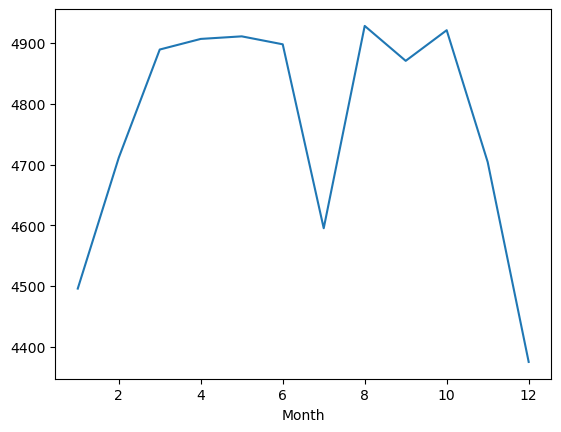

In [27]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.show()

<span style="font-family:verdana">Traffic patterns generally exhibit lighter congestion during the colder months (November-February) and more significant congestion during the warmer months (March-October). However, there is an intriguing exception observed in July.

<span style="font-family:verdana">During July, despite being a warm month, there might be a notable decrease in traffic congestion compared to the surrounding warm months. This could be due to various factors, such as people taking vacations or holidays, schools being closed for summer break, or a shift in commuting patterns as individuals take time off work.

<span style="font-family:verdana">By examining this exception and understanding the underlying reasons, we can gain insights into the dynamics of traffic behavior during July and potentially identify unique factors that influence traffic patterns during this period.

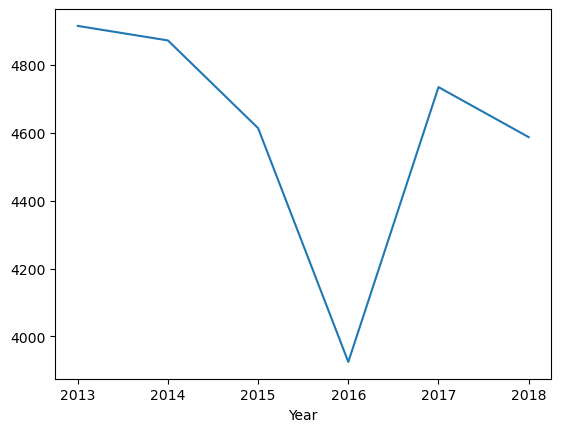

In [28]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month']==7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.xlabel('Year')
plt.show()

<span style="font-family:verdana">Generally, traffic tends to be heavy in July, similar to other warm months. However, an interesting exception is observed in 2016, where a significant decrease in traffic volume was observed during that year. One plausible explanation for this anomaly is road construction activities. [This is the link to 2016 road consturcion](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)

<span style="font-family:verdana">As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (II)

<span style="font-family:verdana">After month, let's look at a day number:

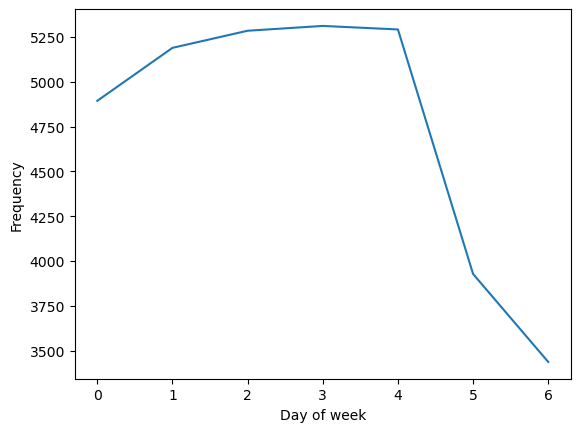

In [29]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Frequency')
plt.xlabel('Day of week')
plt.show()

<span style="font-family:verdana">Traffic volume exhibits a notable increase on business days (Monday-Friday) compared to weekends. Except for Mondays, traffic volume consistently exceeds 5,000 cars during business days. In contrast, on weekends, traffic tends to be lighter, with values generally below 4,000 cars.

<span style="font-family:verdana">This pattern suggests that weekday traffic is influenced by factors such as commuting to and from work, school-related travel, and other business-related activities. The higher volume of cars during weekdays aligns with the typical workweek and the associated rush hour periods. In contrast, weekends typically see reduced traffic, as individuals engage in leisure activities or have more flexible schedules.

## Time Indicators (III)

<span style="font-family:verdana">Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

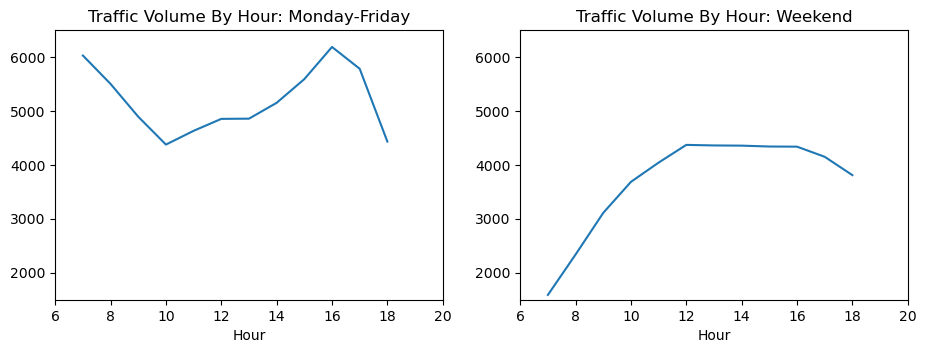

In [30]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
by_hour_weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_bussiness = bussiness_days.groupby('hour').mean()
by_hour_weekend = by_hour_weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_bussiness['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel('Hour')
plt.title('Traffic Volume By Hour: Monday-Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel('Hour')
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

<span style="font-family:verdana">Throughout each hour of the day, traffic volume is typically higher on business days compared to weekends. As anticipated, the rush hours, occurring around 7 AM and 4 PM, experience the highest traffic volumes. These rush hours coincide with the times when the majority of individuals commute from their homes to work and vice versa. During these peak periods, traffic volumes often exceed 6,000 cars.

<span style="font-family:verdana">In summary, our analysis identified several time-related indicators of heavy traffic:
- <span style="font-family:verdana">`Seasonal Variation`: Traffic tends to be heavier during warm months (March-October) compared to cold months (November-February).
- <span style="font-family:verdana">`Business Days vs. Weekends`: Traffic volume is generally higher on business days (Monday-Friday) compared to weekends. This can be attributed to factors such as commuting to work, school-related travel, and other business-related activities.
- <span style="font-family:verdana">`Rush Hours`: On business days, the highest traffic volumes are observed during rush hours, typically around 7 AM and 4 PM. These times coincide with the peak periods when most people are commuting to and from work, resulting in increased congestion on the roads.
    
<span style="font-family:verdana">By considering these time-related indicators, transportation planners, commuters, and relevant stakeholders can develop strategies to manage heavy traffic more effectively. This can include implementing infrastructure improvements, adjusting work schedules, promoting alternative transportation options, and optimizing traffic flow during peak hours.

## Weather Indicators

<span style="font-family:verdana">Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

<span style="font-family:verdana">A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [31]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

<span style="font-family:verdana">Among the relevant columns examined, temperature demonstrates the strongest correlation with traffic_value, albeit with a relatively modest value of +0.13. On the other hand, the remaining columns, including `rain_1h`, `snow_1h`, and `clouds_all`, do not exhibit a substantial correlation with `traffic_volume`.

<span style="font-family:verdana">While temperature exhibits a positive correlation, indicating that higher temperatures might be associated with slightly increased traffic volume, the strength of this relationship is relatively weak. It implies that temperature alone may not be a decisive factor in determining heavy traffic patterns.

<span style="font-family:verdana">Furthermore, the lack of strong correlation between `rain_1h`, `snow_1h`, `clouds_all`, and `traffic_volume` suggests that these weather-related factors might not have a significant impact on traffic volume in the analyzed dataset. Other variables and factors beyond the scope of the dataset may contribute more prominently to heavy traffic indicators.

<span style="font-family:verdana">Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

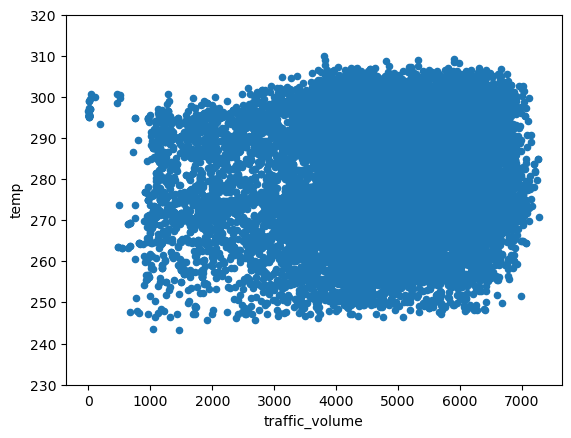

In [32]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

<span style="font-family:verdana">We can conclude that temperature doesn't look like a solid indicator of heavy traffic.
    
<span style="font-family:verdana">Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

## Weather Types

<span style="font-family:verdana">To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.

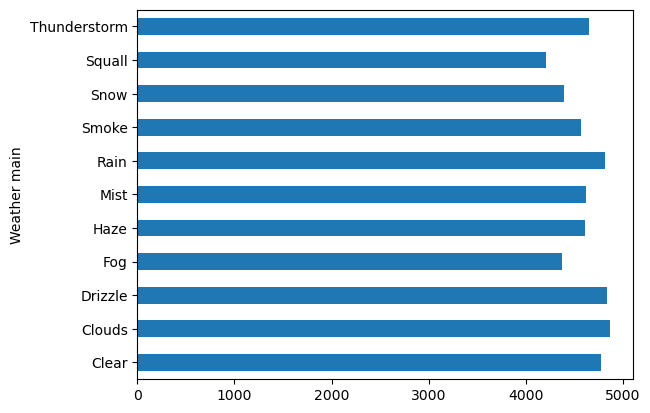

In [33]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.ylabel('Weather main')
plt.show()

<span style="font-family:verdana">It look like there's no weather type where traffic volume exceeds 5.000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

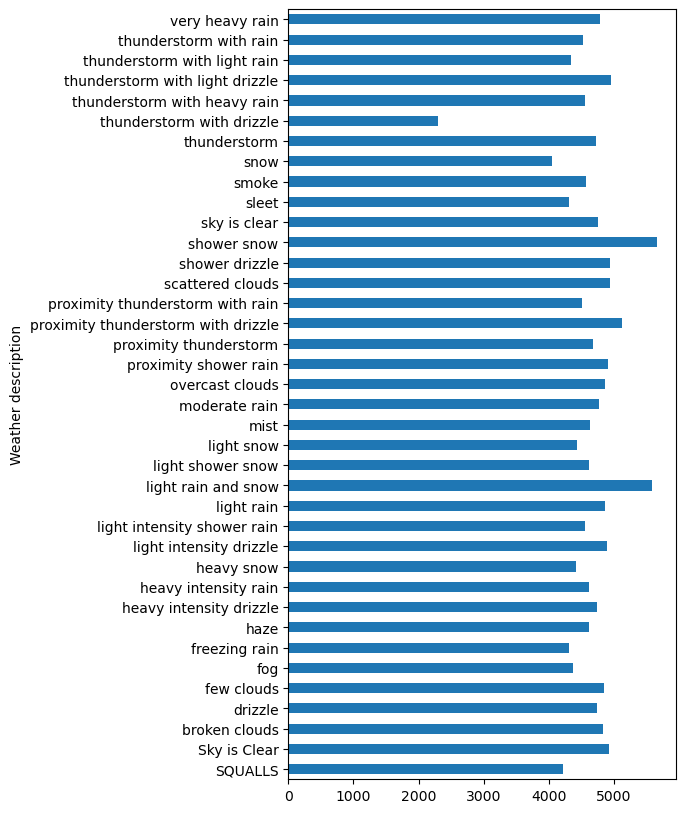

In [34]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.ylabel('Weather description')
plt.show()

<span style="font-family:verdana">It looks like there are three weather types where traffic volume exceeds 5.000:
- <span style="font-family:verdana">Shower snow,
- <span style="font-family:verdana">Light rain and snow,
- <span style="font-family:verdana">Proximity thunderstorm with drizzle.
    
<span style="font-family:verdana">It's not clear why these weather types have the highest average traffic values - this is bad weahter, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

<span style="font-family:verdana">During the course of this project, our objective was to identify indicators of heavy traffic on the I-94 Interstate highway. Throughout our analysis, we successfully identified two types of indicators:
- <span style="font-family:verdana">Time Indicators:
    - <span style="font-family:verdana">Heavy Traffic in Warm Months: We observed that traffic volume tends to be higher during the warm months, specifically from March to October, compared to the colder months of November to February.
    - <span style="font-family:verdana">Business Day vs. Weekend Traffic: The analysis revealed that traffic is generally heavier on business days (Monday to Friday) in comparison to weekends (Saturday and Sunday).
    - <span style="font-family:verdana">Rush Hour Peaks: On business days, the peak traffic hours were observed around 7 AM and 4 PM, aligning with the typical commuting times when a significant number of people travel to and from work.
- <span style="font-family:verdana">Weather Indicators:
    - <span style="font-family:verdana">Shower Snow: Instances of heavy traffic were associated with shower snow conditions, indicating that snowfall can contribute to congestion and slower traffic flow.
    - <span style="font-family:verdana">Light Rain and Snow: Similar to shower snow, light rain and snow were identified as potential weather conditions that could impact traffic volume and contribute to heavy traffic.
    - <span style="font-family:verdana">Proximity Thunderstorm with Drizzle: The presence of a proximity thunderstorm accompanied by drizzle was another weather indicator associated with heavy traffic.
    
<span style="font-family:verdana">By recognizing and understanding these time and weather indicators, transportation authorities and drivers can anticipate and prepare for heavy traffic conditions. Such insights can be used to implement effective traffic management strategies, improve road infrastructure, and promote alternative transportation options to alleviate congestion during peak periods.